In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [15]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [16]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [17]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [18]:
with tf.Session() as sess:
    bs = 50
    lr = 0.005
    it = 300
    x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    hidden_layer_nodes = 5
    a1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
    b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
    a2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
    b2 = tf.Variable(tf.random_normal(shape=[1]))
    hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, a1), b1))
    final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, a2), b2))
    
    loss = tf.reduce_mean(tf.square(y_target - final_output))
    my_opt = tf.train.GradientDescentOptimizer(lr)
    train_step = my_opt.minimize(loss)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    loss_vec = []
    test_loss = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals_train), size=bs)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(np.sqrt(temp_loss))
        
        test_temp_loss = sess.run(loss, feed_dict={
            x_data: x_vals_test,
            y_target: np.transpose([y_vals_test])
        })
        test_loss.append(np.sqrt(test_temp_loss))
        
        if (i + 1) % 50 == 0:
            print('Generation: ' + str(i + 1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 0.65785074
Generation: 100. Loss = 0.44862062
Generation: 150. Loss = 0.41211686
Generation: 200. Loss = 0.30673516
Generation: 250. Loss = 0.25212762
Generation: 300. Loss = 0.29980087


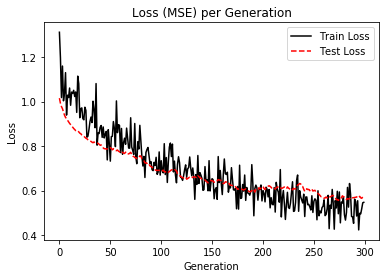

In [19]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()